In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Завантаження Excel-файлу
file_path = 'Коректність відповідей.xlsx'  # або вкажи повний шлях до файлу
df = pd.read_excel(file_path)

In [3]:
# Перетворення оцінки в числовий бал
def convert_score(value):
    if "коректна (повна)" in value:
        return 1.0
    elif "неповна" in value:
        return 0.5
    else:
        return 0.0

In [4]:
# Додаємо колонки з балами
df['score_o3'] = df['anwer_estimation_chat_o3_OpenAI'].apply(convert_score)
df['score_gemini'] = df['anwer_estimation_gemini_2.5_pro_Google'].apply(convert_score)

In [5]:
# Підрахунок сумарних балів
total_score_o3 = df['score_o3'].sum()
total_score_gemini = df['score_gemini'].sum()

In [6]:
total_score_o3, total_score_gemini

(54.0, 97.5)

In [7]:
# Обчислення накопичених балів
df['cum_score_o3'] = df['score_o3'].cumsum()
df['cum_score_gemini'] = df['score_gemini'].cumsum()

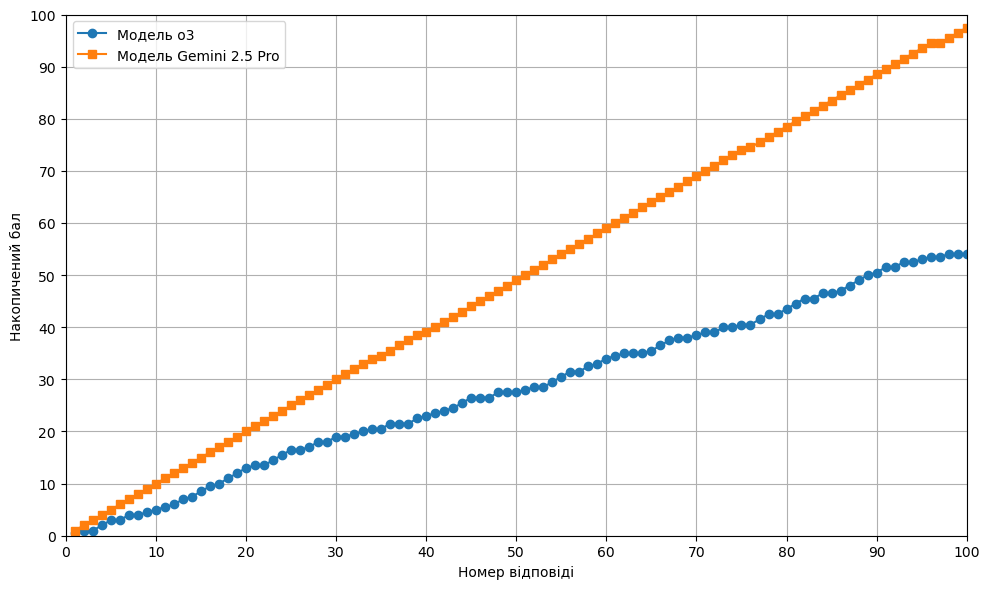

In [8]:
# Побудова графіка
plt.figure(figsize=(10, 6))
plt.plot(df['id'], df['cum_score_o3'], label='Модель o3', marker='o')
plt.plot(df['id'], df['cum_score_gemini'], label='Модель Gemini 2.5 Pro', marker='s')

plt.xlabel('Номер відповіді')
plt.ylabel('Накопичений бал')
#plt.title('Накопичення балів з кожною відповіддю')

# Чіткий контроль осей і поділок
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xticks(ticks=range(0, 101, 10))
plt.yticks(ticks=range(0, 101, 10))

# Стиль сітки
plt.grid(True)
plt.legend()
plt.tight_layout()

# Збереження графіка
plt.savefig("накопичення_балів.png", dpi=300)
plt.show()